이미지 하나 불러오기

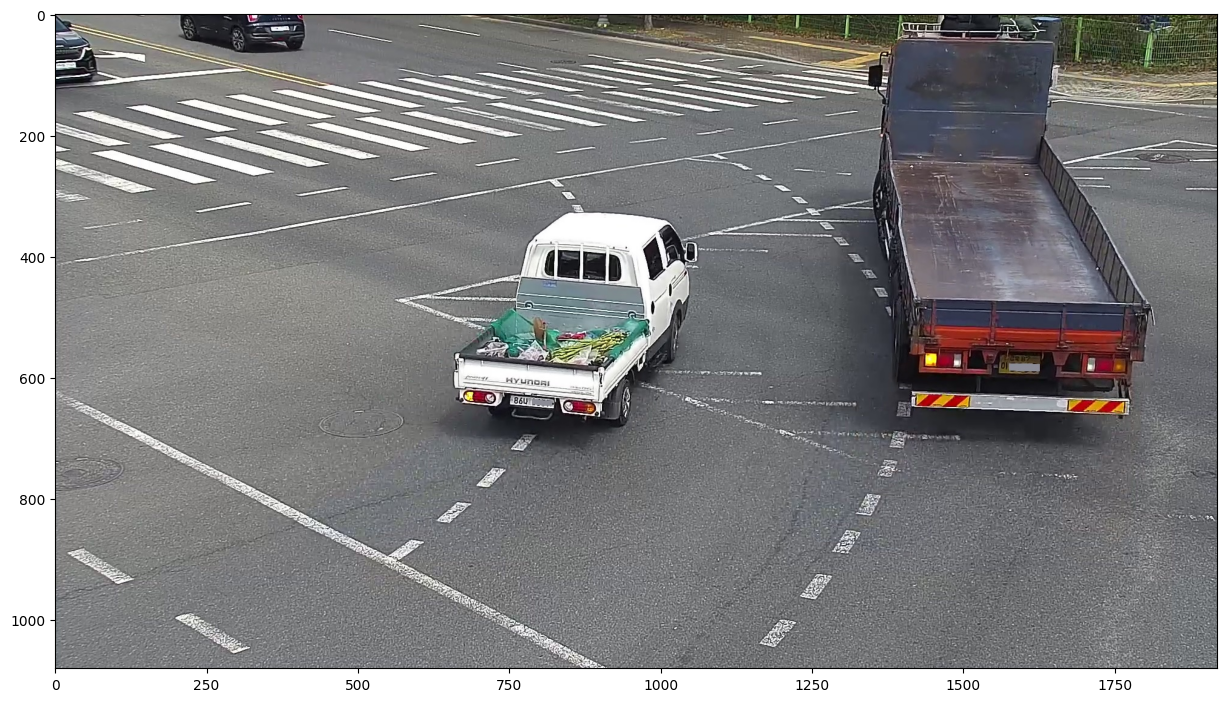

In [ ]:
#C-220917_13_CR13_03_N1228 이거는 conf기반으로 해결
import natsort
from natsort import natsorted
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
ori_image = "/mnt/hdd_6tb/seungeun/HuNature/Test/01.원천데이터/[cr12]휴양림입구사거리/01번/C-220922_13_CR12_01_N0334.jpg"

plt.figure(figsize=(15,15))
image = Image.open(ori_image)
image_np = np.array(image)
plt.imshow(image_np)



원본 이미지를 inference


0: 384x640 3 plates, 49.6ms
Speed: 3.1ms preprocess, 49.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


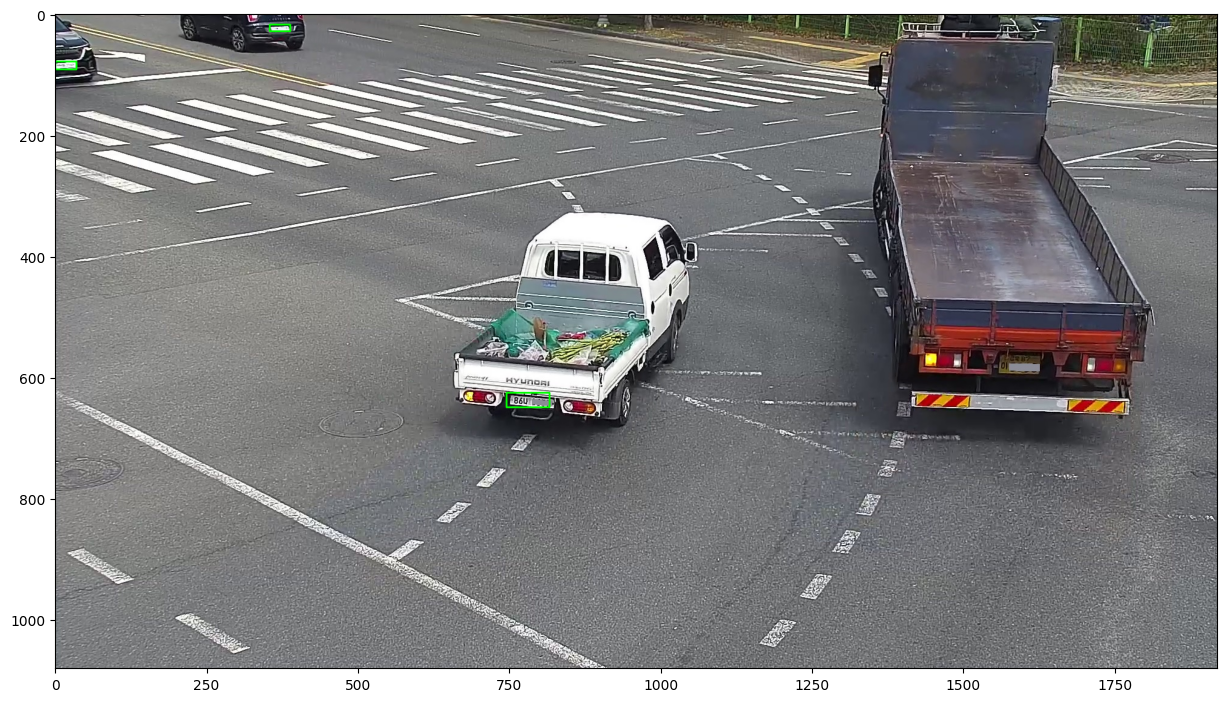

In [ ]:
from ultralytics import YOLO
import supervision as sv
ori_image = "/mnt/hdd_6tb/seungeun/HuNature/Test/01.원천데이터/[cr12]휴양림입구사거리/01번/C-220922_13_CR12_01_N0334.jpg"
test_image = cv2.imread(ori_image)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
H, W = test_image.shape[:2]
model =YOLO("/mnt/hdd_6tb/bill0914/processed_quarter/runs/detect/train2-4분할+resize+DA2/weights/best.pt")
def detect(image):
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)    
    xyxy = detections.xyxy  # 바운딩 박스 좌표
    
    return xyxy.copy(),detections.confidence  # 새로운 리스트 반환


def draw(image, result):
    image_copy = image.copy()  # 원본 손상 방지
    
    for box in result:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
    return image_copy  # 원본이 아닌 복사된 이미지 반환
xyxy,conf  = detect(test_image)

j = 1
plt.figure(figsize=(15, 15))  # 전체 figure는 반복문 밖에서 선언
draw_image = draw(test_image, xyxy)  # 복사된 이미지에만 네모 그리기
plt.imshow(draw_image)




4분할 하면 어떻게 보이는지 -마진 10%

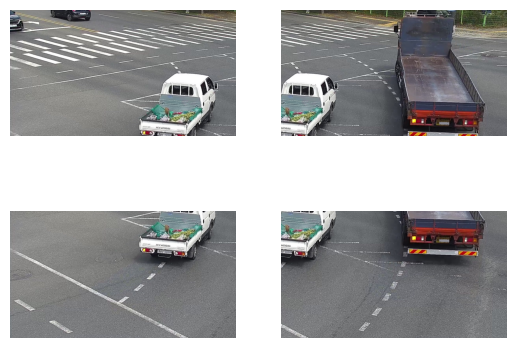

In [45]:
import cv2
ori_image = "/mnt/hdd_6tb/seungeun/HuNature/Test/01.원천데이터/[cr12]휴양림입구사거리/01번/C-220922_13_CR12_01_N0334.jpg"
test_image = cv2.imread(ori_image)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
H, W = test_image.shape[:2]
h_margin = H//10
w_margin = W//10
image1 = test_image[0:H//2 + h_margin, 0:W//2 + w_margin] #좌상단
image2 = test_image[0:H//2 + h_margin, W//2 - w_margin:W] #우상단
image3 = test_image[H//2 - h_margin:H, 0:W//2 + w_margin] #좌하단
image4 = test_image[H//2 - h_margin:H, W//2 - w_margin:W] #우하단

plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(image1)
plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(image2)
plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(image3)
plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(image4)
plt.axis("off")
plt.show()

4분할 이미지inference


0: 384x640 1 plate, 55.8ms
Speed: 3.3ms preprocess, 55.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
{'xyxy': [array([[     749.73,      629.45,      825.61,         648]], dtype=float32)], 'conf': [array([    0.36882], dtype=float32)]}

0: 384x640 (no detections), 43.9ms
Speed: 2.2ms preprocess, 43.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
{'xyxy': [array([], shape=(0, 4), dtype=float32)], 'conf': [array([], dtype=float32)]}

0: 384x640 1 plate, 45.4ms
Speed: 2.4ms preprocess, 45.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
{'xyxy': [array([[     750.99,       196.7,      825.94,      220.13]], dtype=float32)], 'conf': [array([    0.81226], dtype=float32)]}

0: 384x640 1 plate, 43.3ms
Speed: 2.3ms preprocess, 43.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
{'xyxy': [array([[     1.9057,      198.35,      57.045,      220.61]], dtype=float32)], 'conf': [array([    0.82401], dtype=float32)

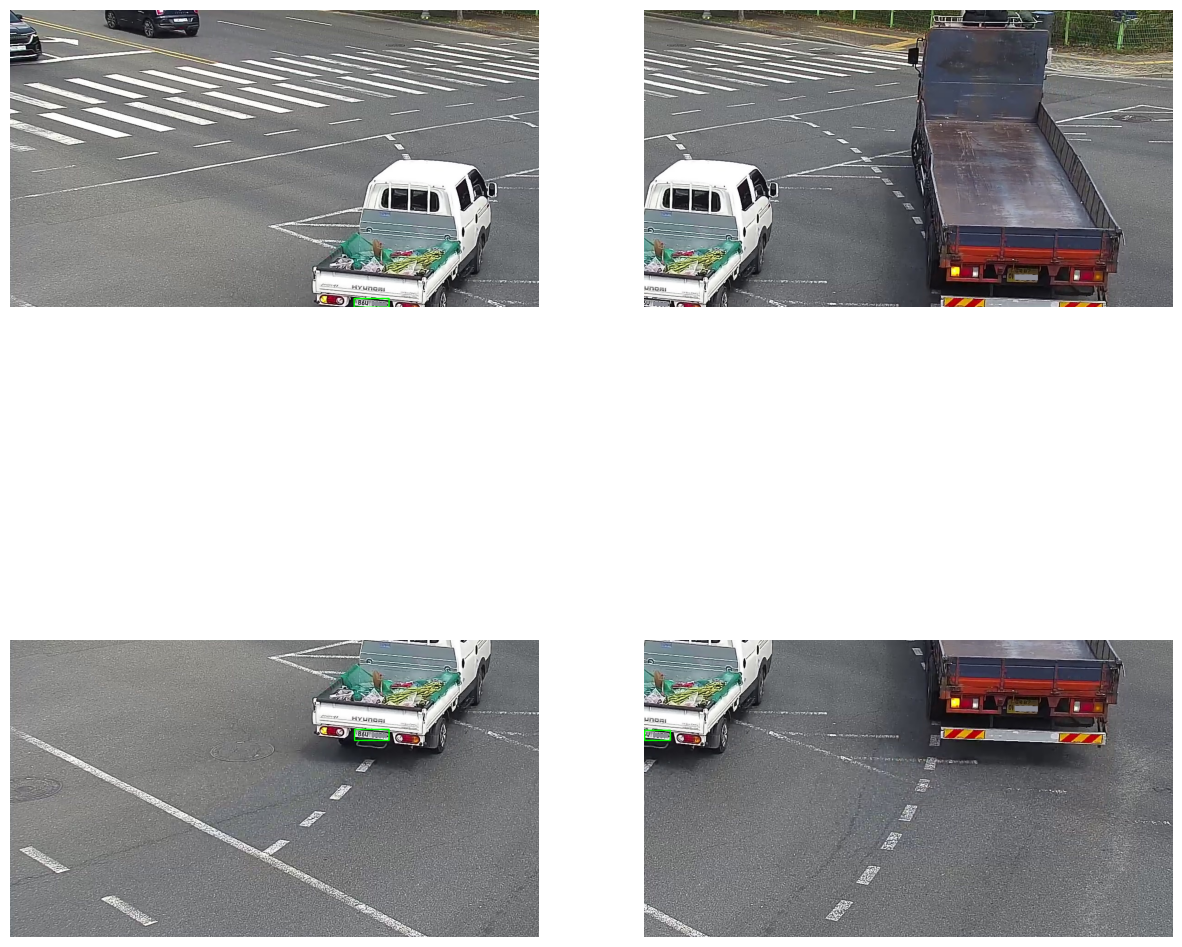

In [48]:
from ultralytics import YOLO
import supervision as sv
ori_image = "/mnt/hdd_6tb/seungeun/HuNature/Test/01.원천데이터/[cr12]휴양림입구사거리/01번/C-220922_13_CR12_01_N0334.jpg"
test_image = cv2.imread(ori_image)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
H, W = test_image.shape[:2]
h_margin = H//10
w_margin = W//10
image1 = test_image[0:H//2 + h_margin, 0:W//2 + w_margin] #좌상단
image2 = test_image[0:H//2 + h_margin, W//2 - w_margin:W] #우상단
image3 = test_image[H//2 - h_margin:H, 0:W//2 + w_margin] #좌하단
image4 = test_image[H//2 - h_margin:H, W//2 - w_margin:W] #우하단
model =YOLO("/mnt/hdd_6tb/bill0914/processed_quarter/runs/detect/train2-4분할+resize+DA2/weights/best.pt")
bbox_list=[]
def detect(image):
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)    
    xyxy = detections.xyxy  # 바운딩 박스 좌표
    
    return xyxy.copy(),detections.confidence  # 새로운 리스트 반환


def draw(image, result):
    image_copy = image.copy()  # 원본 손상 방지
    
    for box in result:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
    return image_copy  # 원본이 아닌 복사된 이미지 반환
j = 1
plt.figure(figsize=(15, 15))  # 전체 figure는 반복문 밖에서 선언

for image, (w, h) in zip([image1, image2, image3, image4], 
                         [(0, 0), (W//2-w_margin, 0), (0, H//2-h_margin), (W//2-w_margin, H//2-h_margin)]):
    xyxy_dic = {'xyxy':[],'conf':[]}
    xyxy,conf = detect(image)  # 모델 예측 (각 이미지별로 새로운 bbox 생성)
    xyxy_dic['xyxy'].append(xyxy)
    xyxy_dic['conf'].append(conf)
    print(xyxy_dic)

    draw_image = draw(image, xyxy)  # 복사된 이미지에만 네모 그리기

    plt.subplot(2, 2, j)
    plt.imshow(draw_image)
    plt.axis("off")  # 축 제거 (선택 사항)

    j += 1

plt.show()


#result = sak(bbox_list)
#image = draw(test_image,bbox_list)
#image = np.array(image)
#plt.figure(figsize=(15, 15))
#plt.imshow(image)



이제 겹치는걸 없애보자


0: 384x640 1 plate, 48.9ms
Speed: 2.6ms preprocess, 48.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
[[749.734130859375, 629.4534301757812, 825.6094360351562, 648.0]] [0.36882463097572327]

0: 384x640 (no detections), 43.5ms
Speed: 2.6ms preprocess, 43.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
[] []

0: 384x640 1 plate, 55.0ms
Speed: 2.5ms preprocess, 55.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
[[750.9942626953125, 196.70352172851562, 825.9390258789062, 220.12562561035156]] [0.8122620582580566]

0: 384x640 1 plate, 42.8ms
Speed: 5.1ms preprocess, 42.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
[[1.9057090282440186, 198.3531494140625, 57.04536437988281, 220.6055145263672]] [0.8240082263946533]

0: 384x640 3 plates, 43.4ms
Speed: 3.1ms preprocess, 43.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
[[354.3710021972656, 17.64059829711914, 388.41705322265625, 28.323200

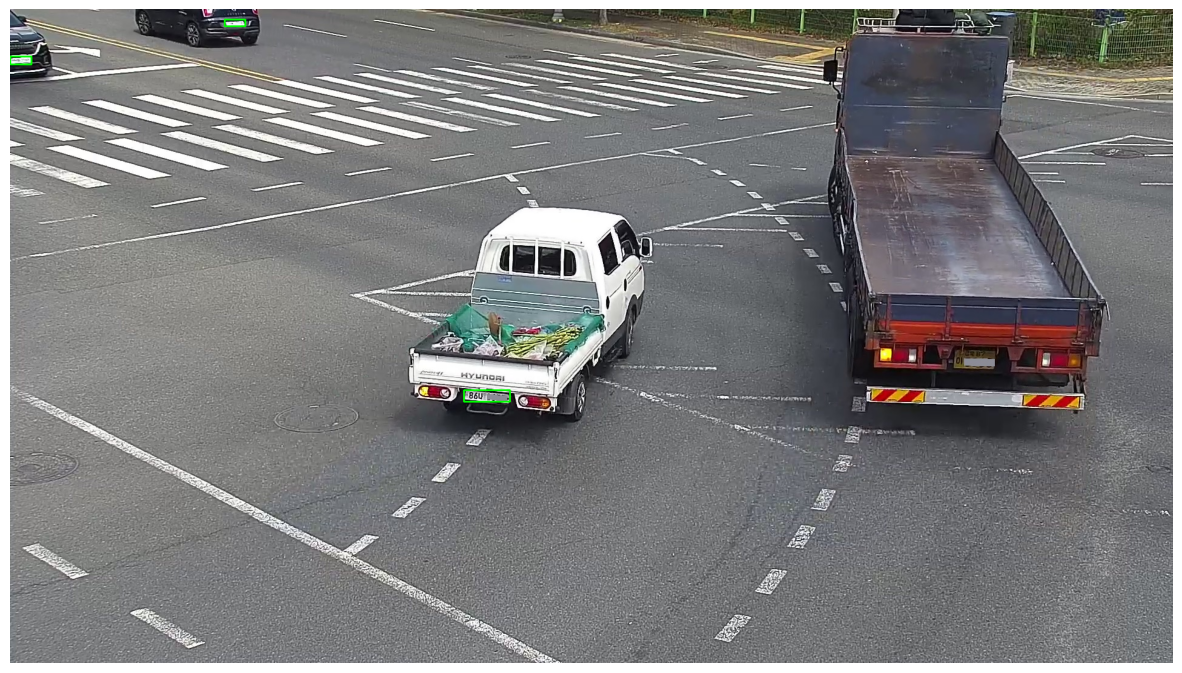

In [8]:
def NMS_only_xyxy(bbox_list):
    '''
    bbox_list에 대한 NMS를 계산하는 함수입니다

    Args:
        bbox_list (list) : [[x1,y1,x2,y2],[x3,y3,x4,y4],,,]로 저장된 bbox리스트

    Returns:
        result_bbox : bbox_list끼리 NMS를 통해 최종 선별된 bbox_list
    '''
    holy=[]
    for i in range(len(bbox_list)):
        for j in range(len(bbox_list)):
             if j<i:
                continue
             elif 1>calculate_iou(bbox_list[i],bbox_list[j])>0.2:
                 
                holy.append(bbox_list[j])
    unique_list = []
    for item in holy:
        if item not in unique_list:
            unique_list.append(item)
    result = [x for x in bbox_list if x not in unique_list]
                 
    return result
def calculate_iou(xyxy1, xyxy2):
    """
    두 bounding box의 IOU 를 계산
    
    Args:
        xyxy1 (list): 첫 번째 bounding box [x1, y1, x2, y2]
        xyxy2 (list): 두 번째 bounding box [x1, y1, x2, y2]
    
    Returns:
        float: IOU ex)0.387
    """
   
    x1_inter = max(xyxy1[0], xyxy2[0])
    y1_inter = max(xyxy1[1], xyxy2[1])
    x2_inter = min(xyxy1[2], xyxy2[2])
    y2_inter = min(xyxy1[3], xyxy2[3])

    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    area1 = (xyxy1[2] - xyxy1[0]) * (xyxy1[3] - xyxy1[1])
    area2 = (xyxy2[2] - xyxy2[0]) * (xyxy2[3] - xyxy2[1])

    union_area = area1 + area2 - inter_area
    iou = inter_area / union_area if union_area > 0 else 0
    
    return iou
def NMS_xyxy_with_conf(bbox_list, confidence_list, iou_threshold=0.2):
    # 리스트 변환 (튜플이 되지 않도록)
    bbox_list = list(bbox_list)
    confidence_list = list(confidence_list)

    # Confidence 기준으로 내림차순 정렬
    sorted_indices = sorted(range(len(confidence_list)), key=lambda i: confidence_list[i], reverse=True)
    bbox_list = [bbox_list[i] for i in sorted_indices]
    confidence_list = [confidence_list[i] for i in sorted_indices]

    selected_bboxes = []
    selected_confidences = []

    while bbox_list:
        # 현재 confidence가 가장 높은 bbox 선택
        best_bbox = bbox_list.pop(0)
        best_conf = confidence_list.pop(0)
        
        selected_bboxes.append(best_bbox)
        selected_confidences.append(best_conf)

        # Step 2: 현재 선택된 bbox와 IOU 비교하여 threshold 이상이면 제거
        if bbox_list:  # bbox_list가 비어있지 않을 때만 실행
            filtered_bboxes = []
            filtered_confidences = []
            for bbox, conf in zip(bbox_list, confidence_list):
                if calculate_iou(best_bbox, bbox) < iou_threshold:
                    filtered_bboxes.append(bbox)
                    filtered_confidences.append(conf)

            bbox_list = filtered_bboxes
            confidence_list = filtered_confidences

    return selected_bboxes, selected_confidences
from memory_profiler import profile
from ultralytics import YOLO
import supervision as sv
import cv2
import matplotlib.pyplot as plt


# 원본 이미지 로드 및 변환
ori_image_path = "/mnt/hdd_6tb/seungeun/HuNature/Test/01.원천데이터/[cr12]휴양림입구사거리/01번/C-220922_13_CR12_01_N0334.jpg"
test_image = cv2.imread(ori_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
H, W = test_image.shape[:2]

# 마진 계산
h_margin = H // 10
w_margin = W // 10

# 4개로 이미지 분할
image1 = test_image[0:H//2 + h_margin, 0:W//2 + w_margin]  # 좌상단
image2 = test_image[0:H//2 + h_margin, W//2 - w_margin:W]  # 우상단
image3 = test_image[H//2 - h_margin:H, 0:W//2 + w_margin]  # 좌하단
image4 = test_image[H//2 - h_margin:H, W//2 - w_margin:W]  # 우하단

# YOLO 모델 로드
model = YOLO("/mnt/hdd_6tb/bill0914/processed_quarter/runs/detect/train2-4분할+resize+DA2/weights/best.pt")

def detect(image):
    """ YOLO 모델로 객체 탐지 """
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)  
    print(detections.xyxy.tolist(),detections.confidence.tolist())  
    return detections.xyxy.tolist(), detections.confidence.tolist()  # 리스트 변환하여 반환

def draw(image, bbox_list):
    """ 탐지된 바운딩 박스를 원본 이미지에 그림 """
    image_copy = image.copy()  # 원본 손상 방지
    for box in bbox_list:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
    return image_copy

# 탐지된 bbox 저장
xyxy_list = []
conf_list = []

# 이미지 분할 영역에 대한 위치 오프셋
offsets = [(0, 0), (W//2 - w_margin, 0), (0, H//2 - h_margin), (W//2 - w_margin, H//2 - h_margin)]

# 각 이미지에서 탐지 수행
for image, (w_offset, h_offset) in zip([image1, image2, image3, image4], offsets):
    xyxy, conf = detect(image)  # 탐지 수행
    adjusted_xyxy = [[x1 + w_offset, y1 + h_offset, x2 + w_offset, y2 + h_offset] for x1, y1, x2, y2 in xyxy]
    
    xyxy_list.extend(adjusted_xyxy)  # 변환된 bbox 추가
    conf_list.extend(conf)  # confidence 추가
ori_xyxy,ori_conf = detect(test_image)
xyxy_list.extend(ori_xyxy)
conf_list.extend(ori_conf)
# NMS 적용
final_xyxy = NMS_only_xyxy(xyxy_list)

# 최종 바운딩 박스 그리기
draw_image = draw(test_image, final_xyxy)

# 시각화
plt.figure(figsize=(15, 15))
plt.imshow(draw_image)
plt.axis("off")
plt.show()

